# Detecting blinking

In [34]:
%load_ext autoreload
%autoreload 2
% matplotlib inline
import os, sys
import numpy as np
from scipy.ndimage import filters
from scipy import fftpack
import matplotlib.pyplot as plt
sys.path += [os.path.abspath('.'), os.path.abspath('..')]
import bci.data_utils as tl_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
SAMPLE_FILE = os.path.join(tl_data.update_path('local_data'), 'blinking', '5.bin')
eeg = tl_data.load_data(SAMPLE_FILE)
print (eeg.shape)

(4684, 8)


(None, <matplotlib.legend.Legend at 0x7f8e4d1f67b8>, (0, 2684))

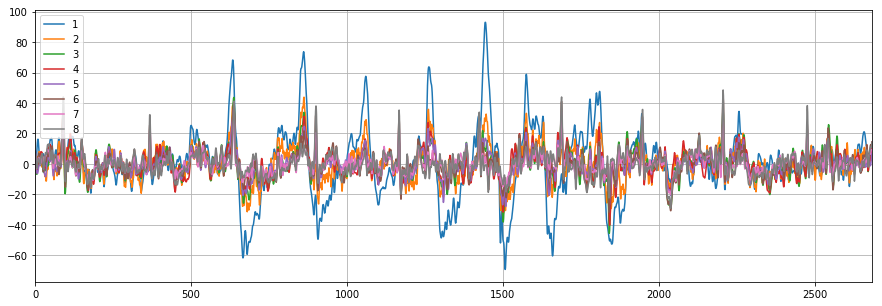

In [26]:
plt.figure(figsize=(15, 5))
for i in range(eeg.shape[1]):
    plt.plot(eeg[2000:, i], label=str(i + 1))
plt.grid(), plt.legend(loc=2), plt.xlim([0, len(eeg) - 2000])

(<matplotlib.legend.Legend at 0x7f8e477e7668>, None)

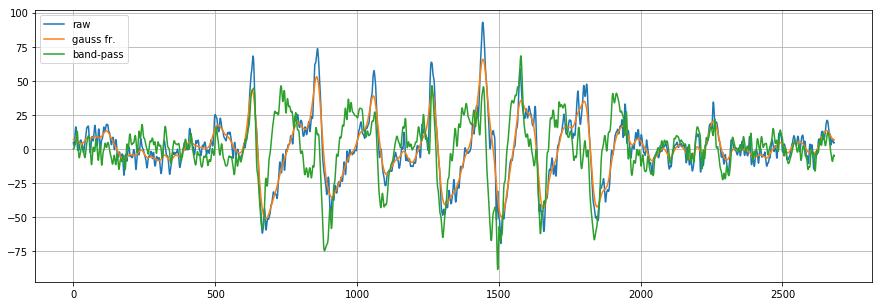

In [31]:
eeg_vision = eeg[2000:, 0]
eeg_vis_gauss = filters.gaussian_filter1d(eeg_vision, sigma=10)
eeg_vis_bpass = tl_data.filter_signal(eeg_vision, bands=[1, 30])
plt.figure(figsize=(15, 5))
plt.plot(eeg_vision, label='raw')
plt.plot(eeg_vis_gauss, label='gauss fr.')
plt.plot(eeg_vis_bpass, label='band-pass')
plt.legend(loc=2), plt.grid()

start - 0000 -> 478.000427
start - 0500 -> 801.627258
start - 0700 -> 994.659546
start - 0900 -> 1803.453491
start - 1000 -> 1805.615723
start - 1500 -> 1359.483154
start - 2000 -> 266.132507


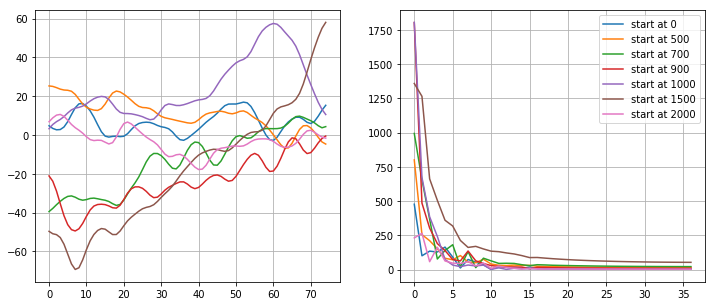

In [63]:
samples = [0, 500, 700, 900, 1000, 1500, 2000]
offset = 75
eeg_vis_blocks = [eeg_vision[i:i + offset] for i in samples]
fig, axarr = plt.subplots(ncols=2, figsize=(12, 5))
for i, eb in enumerate(eeg_vis_blocks):
    axarr[0].plot(eb)
    yf = fftpack.fft(eb)
    axarr[1].plot(abs(yf[:int(offset/2)]), label='start at %i' % samples[i])
    print ('start - %04i -> %f' % (samples[i], np.max(np.abs(yf[:5]))))
for i in range(2):
    axarr[i].grid()
_= axarr[1].legend(loc=1)

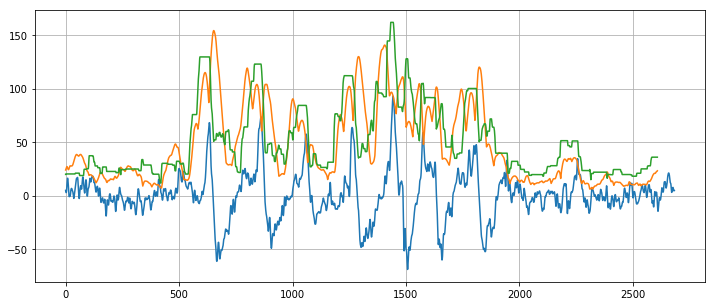

In [62]:
frame = 75
fft_max = []
diffs = []
for i in range(frame, len(eeg_vision)):
    sig = eeg_vision[i-frame:i]
    fft_max.append(np.max(np.abs(fftpack.fft(sig))))
    diffs.append(max(sig) - min(sig))
    
plt.figure(figsize=(12, 5))
plt.plot(eeg_vision)
plt.plot(np.array(fft_max) / 20.)
plt.plot(np.array(diffs) / 1.)
plt.grid()